In [2]:
! pip install -q qiskit
! pip install -q qiskit-aer
! pip install -q qiskit-algorithms
! pip install -q qiskit-nature
! pip install -q qiskit-nature-pyscf # install the pyscf library
! pip install -q qiskit-ibm-runtime
# print(qiskit.__version__)
# print(qiskit_aer.__version__)
# print(qiskit_algorithms.__version__)
# print(qiskit_nature.__version__)
# print(qiskit_nature_pyscf.__version__)
# print(qiskit_ibm_runtime.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8

In [3]:
import qiskit_nature
import qiskit
import qiskit_aer
import qiskit_algorithms
import qiskit_ibm_runtime
import qiskit_nature_pyscf
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit.circuit.library import EfficientSU2
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_aer import  AerSimulator
# from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_algorithms.optimizers import SLSQP
from qiskit_aer.primitives import Estimator
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.problems import ElectronicBasis
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.second_q.mappers import ParityMapper
from scipy.linalg import eigh
from qiskit_nature.second_q.circuit.library import HartreeFock
from scipy.linalg import expm
from qiskit.quantum_info import Statevector
from numpy import pi

In [60]:
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper

# Define hopping strength
t = -1.0
fermionic_hamiltonian = FermionicOp({
    "+_0 -_1": -t,
    "+_1 -_2": -t,
    "+_2 -_0": -t,
    "+_1 -_0": -t,
    "+_2 -_1": -t,
    "+_0 -_2": -t
    })

# Apply Jordan-Wigner transformation
mapper = JordanWignerMapper()
qubit_hamiltonian = mapper.map(fermionic_hamiltonian)
print("Qubit Hamiltonian (Pauli Operators):")
print(qubit_hamiltonian)

Qubit Hamiltonian (Pauli Operators):
SparsePauliOp(['IYY', 'IXX', 'YYI', 'XXI', 'XZX', 'YZY'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


In [61]:
from scipy.linalg import eigh
eign, eigv = eigh(qubit_hamiltonian.to_matrix())
print(eign)
print(eigv)

[-2. -1. -1.  0.  0.  1.  1.  2.]
[[ 0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.81649658+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.57735027+0.j]
 [ 0.        +0.j  0.70710678+0.j -0.40824829+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.57735027+0.j]
 [ 0.57735027+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j -0.81649658+0.j  0.        +0.j]
 [ 0.        +0.j -0.70710678+0.j -0.40824829+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.57735027+0.j]
 [-0.57735027+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.70710678+0.j -0.40824829+0.j  0.        +0.j]
 [ 0.57735027+0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.70710678+0.j  0.40824829+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  

     ┌──────────┐┌──────────┐                  ┌──────────┐ ┌──────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├──────────■───────┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├
     ├──────────┤├──────────┤        ┌─┴─┐     ├──────────┤┌┴──────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├──■─────┤ X ├─────┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├
     ├──────────┤├──────────┤┌─┴─┐┌──┴───┴───┐┌┴──────────┤└───────────┘
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├┤ X ├┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├─────────────
     └──────────┘└──────────┘└───┘└──────────┘└───────────┘             

Final Results:
Ground state energy: -1.185546875
Parameters at each step:


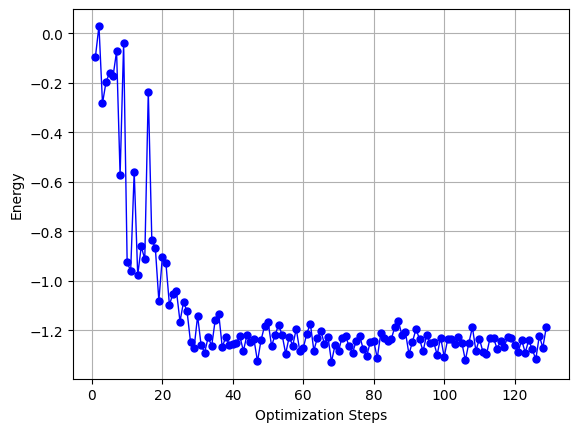

In [44]:
from qiskit_aer import Aer
from qiskit_algorithms.optimizers import COBYLA
backend = Aer.get_backend('statevector_simulator')


steps = []
energy = []
class ParameterTracker:
    def __init__(self):
        self.params_history = []

    def callback(self, eval_count, params, mean, std):
        self.params_history.append((eval_count, params.copy(), mean))
        # print(f"Step {eval_count}: Energy = {mean:.6f}, Parameters = {params}")
        energy.append(mean)
        steps.append(eval_count)

tracker = ParameterTracker()


# Define the ansatz (EfficientSU2)
num_qubits = qubit_hamiltonian.num_qubits
ansatz = EfficientSU2(num_qubits, reps=1)
print(ansatz.decompose().draw(fold=-1))

# Define the optimizer
optimizer = COBYLA(maxiter=1000)

# Define the VQE instance
vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=optimizer, callback=tracker.callback)

# Run VQE
result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)

# Display results
print("\nFinal Results:")
print(f"Ground state energy: {result.eigenvalue.real}")
print("Parameters at each step:")
# for step in tracker.params_history:
#     step_idx, params, energy = step
#     print(f"Step {step_idx}: Energy = {energy:.6f}, Parameters = {params}")


# Plotting the energy at each step
plt.plot(steps, energy, marker='o', linestyle='-', color='b', linewidth=1.0, markersize=5)
# plt.title("VQE Optimization: Energy vs Steps")
plt.xlabel("Optimization Steps")
plt.ylabel("Energy")
plt.grid()
plt.show()

     ┌──────────┐┌──────────┐ ░ ┌───┐           ░ ┌──────────┐ ┌──────────┐ ░ ┌───┐           ░ ┌───────────┐┌───────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├─░─┤ X ├──■────────░─┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├─░─┤ X ├──■────────░─┤ Ry(θ[12]) ├┤ Rz(θ[15]) ├
     ├──────────┤├──────────┤ ░ └─┬─┘┌─┴─┐      ░ ├──────────┤┌┴──────────┤ ░ └─┬─┘┌─┴─┐      ░ ├───────────┤├───────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├─░───┼──┤ X ├──■───░─┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├─░───┼──┤ X ├──■───░─┤ Ry(θ[13]) ├┤ Rz(θ[16]) ├
     ├──────────┤├──────────┤ ░   │  └───┘┌─┴─┐ ░ ├──────────┤├───────────┤ ░   │  └───┘┌─┴─┐ ░ ├───────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─░───■───────┤ X ├─░─┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├─░───■───────┤ X ├─░─┤ Ry(θ[14]) ├┤ Rz(θ[17]) ├
     └──────────┘└──────────┘ ░           └───┘ ░ └──────────┘└───────────┘ ░           └───┘ ░ └───────────┘└───────────┘

Final Results:
Ground state energy: -0.978515625
Parameters at each step:


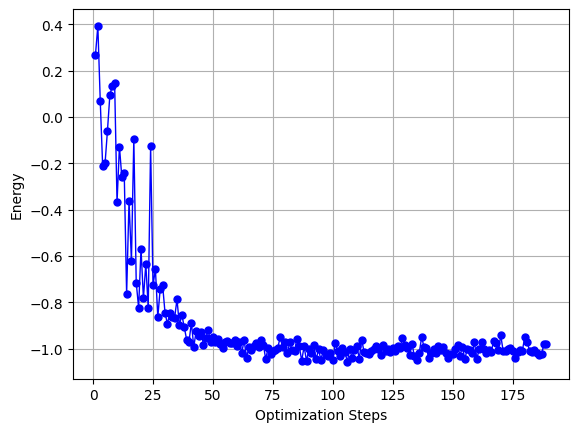

In [45]:
# Backend for the simulation
from qiskit_aer import Aer
from qiskit_algorithms.optimizers import COBYLA
backend = Aer.get_backend('statevector_simulator')

# Custom callback to track parameters at each step
steps = []
energy = []
class ParameterTracker:
    def __init__(self):
        self.params_history = []

    def callback(self, eval_count, params, mean, std):
        self.params_history.append((eval_count, params.copy(), mean))
        # print(f"Step {eval_count}: Energy = {mean:.6f}, Parameters = {params}")
        energy.append(mean)
        steps.append(eval_count)

tracker = ParameterTracker()


# Define the ansatz (EfficientSU2)
num_qubits = qubit_hamiltonian.num_qubits
ansatz = EfficientSU2(num_qubits, reps=2, insert_barriers=True, entanglement="circular")
print(ansatz.decompose().draw(fold=-1))

# Define the optimizer
optimizer = COBYLA(maxiter=1000)

# Define the VQE instance
vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=optimizer, callback=tracker.callback)

# Run VQE
result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)

# Display results
print("\nFinal Results:")
print(f"Ground state energy: {result.eigenvalue.real}")
print("Parameters at each step:")
# for step in tracker.params_history:
#     step_idx, params, energy = step
#     print(f"Step {step_idx}: Energy = {energy:.6f}, Parameters = {params}")


# Plotting the energy at each step
plt.plot(steps, energy, marker='o', linestyle='-', color='b', linewidth=1.0, markersize=5)
# plt.title("VQE Optimization: Energy vs Steps")
plt.xlabel("Optimization Steps")
plt.ylabel("Energy")
plt.grid()
plt.show()

     ┌──────────┐┌──────────┐ ░ ┌───┐           ░ ┌──────────┐ ┌──────────┐ ░ ┌───┐           ░ ┌───────────┐┌───────────┐ ░ ┌───┐           ░ ┌───────────┐┌───────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├─░─┤ X ├──■────────░─┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├─░─┤ X ├──■────────░─┤ Ry(θ[12]) ├┤ Rz(θ[15]) ├─░─┤ X ├──■────────░─┤ Ry(θ[18]) ├┤ Rz(θ[21]) ├
     ├──────────┤├──────────┤ ░ └─┬─┘┌─┴─┐      ░ ├──────────┤┌┴──────────┤ ░ └─┬─┘┌─┴─┐      ░ ├───────────┤├───────────┤ ░ └─┬─┘┌─┴─┐      ░ ├───────────┤├───────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├─░───┼──┤ X ├──■───░─┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├─░───┼──┤ X ├──■───░─┤ Ry(θ[13]) ├┤ Rz(θ[16]) ├─░───┼──┤ X ├──■───░─┤ Ry(θ[19]) ├┤ Rz(θ[22]) ├
     ├──────────┤├──────────┤ ░   │  └───┘┌─┴─┐ ░ ├──────────┤├───────────┤ ░   │  └───┘┌─┴─┐ ░ ├───────────┤├───────────┤ ░   │  └───┘┌─┴─┐ ░ ├───────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─░───■───────┤ X ├─░─┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├─░───■───────┤ X ├─░─┤ Ry(θ[14]) ├┤ Rz(θ[17]) ├─░───■───────┤ X ├─░─┤ Ry(θ[

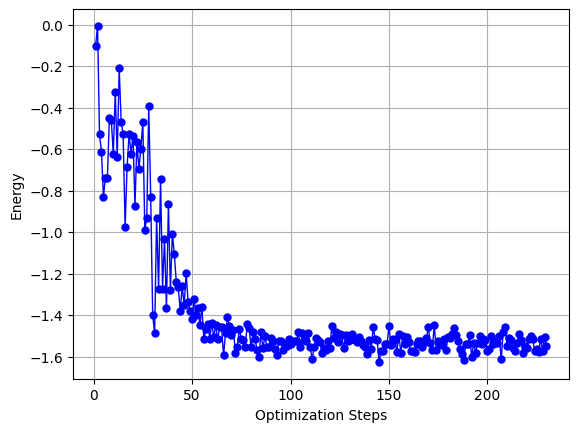

In [46]:
# Backend for the simulation
from qiskit_aer import Aer
from qiskit_algorithms.optimizers import COBYLA
backend = Aer.get_backend('statevector_simulator')

# Custom callback to track parameters at each step
steps = []
energy = []
class ParameterTracker:
    def __init__(self):
        self.params_history = []

    def callback(self, eval_count, params, mean, std):
        self.params_history.append((eval_count, params.copy(), mean))
        # print(f"Step {eval_count}: Energy = {mean:.6f}, Parameters = {params}")
        energy.append(mean)
        steps.append(eval_count)

tracker = ParameterTracker()


# Define the ansatz (EfficientSU2)
num_qubits = qubit_hamiltonian.num_qubits
ansatz = EfficientSU2(num_qubits, reps=3, insert_barriers=True, entanglement="circular")
print(ansatz.decompose().draw(fold=-1))

# Define the optimizer
optimizer = COBYLA(maxiter=1000)

# Define the VQE instance
vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=optimizer, callback=tracker.callback)

# Run VQE
result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)

# Display results
print("\nFinal Results:")
print(f"Ground state energy: {result.eigenvalue.real}")
print("Parameters at each step:")
# for step in tracker.params_history:
#     step_idx, params, energy = step
#     print(f"Step {step_idx}: Energy = {energy:.6f}, Parameters = {params}")


# Plotting the energy at each step
plt.plot(steps, energy, marker='o', linestyle='-', color='b', linewidth=1.0, markersize=5)
# plt.title("VQE Optimization: Energy vs Steps")
plt.xlabel("Optimization Steps")
plt.ylabel("Energy")
plt.grid()
plt.show()

     ┌──────────┐┌──────────┐ ░                 ░ ┌──────────┐ ┌──────────┐ ░                 ░ ┌───────────┐┌───────────┐ ░                 ░ ┌───────────┐┌───────────┐ ░                 ░ ┌───────────┐┌───────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├─░───■────■────────░─┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├─░───■────■────────░─┤ Ry(θ[12]) ├┤ Rz(θ[15]) ├─░───■────■────────░─┤ Ry(θ[18]) ├┤ Rz(θ[21]) ├─░───■────■────────░─┤ Ry(θ[24]) ├┤ Rz(θ[27]) ├
     ├──────────┤├──────────┤ ░ ┌─┴─┐  │        ░ ├──────────┤┌┴──────────┤ ░ ┌─┴─┐  │        ░ ├───────────┤├───────────┤ ░ ┌─┴─┐  │        ░ ├───────────┤├───────────┤ ░ ┌─┴─┐  │        ░ ├───────────┤├───────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[13]) ├┤ Rz(θ[16]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[19]) ├┤ Rz(θ[22]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[25]) ├┤ Rz(θ[28]) ├
     ├──────────┤├──────────┤ ░ └───┘┌─┴─┐┌─┴─┐ ░ ├──────────┤├───────────┤ ░ └───┘┌─┴─┐┌─┴─┐ ░ ├───────────┤├───────────┤ ░ └───┘┌─

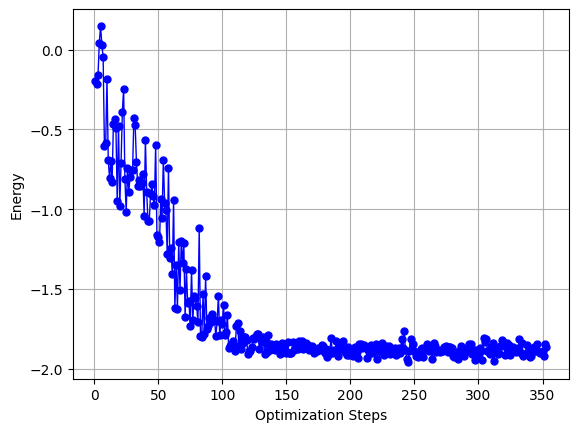

In [47]:
# Backend for the simulation
from qiskit_aer import Aer
from qiskit_algorithms.optimizers import COBYLA
backend = Aer.get_backend('statevector_simulator')

# Custom callback to track parameters at each step
steps = []
energy = []
class ParameterTracker:
    def __init__(self):
        self.params_history = []

    def callback(self, eval_count, params, mean, std):
        self.params_history.append((eval_count, params.copy(), mean))
        # print(f"Step {eval_count}: Energy = {mean:.6f}, Parameters = {params}")
        energy.append(mean)
        steps.append(eval_count)

tracker = ParameterTracker()


# Define the ansatz (EfficientSU2)
num_qubits = qubit_hamiltonian.num_qubits
ansatz = EfficientSU2(num_qubits, reps=4, insert_barriers=True, entanglement="full")
print(ansatz.decompose().draw(fold=-1))

# Define the optimizer
optimizer = COBYLA(maxiter=1000)

# Define the VQE instance
vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=optimizer, callback=tracker.callback)

# Run VQE
result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)

# Display results
print("\nFinal Results:")
print(f"Ground state energy: {result.eigenvalue.real}")
print("Parameters at each step:")
# for step in tracker.params_history:
#     step_idx, params, energy = step
#     print(f"Step {step_idx}: Energy = {energy:.6f}, Parameters = {params}")


# Plotting the energy at each step
plt.plot(steps, energy, marker='o', linestyle='-', color='b', linewidth=1.0, markersize=5)
# plt.title("VQE Optimization: Energy vs Steps")
plt.xlabel("Optimization Steps")
plt.ylabel("Energy")
plt.grid()
plt.show()

     ┌──────────┐┌──────────┐ ░                 ░ ┌──────────┐ ┌──────────┐ ░                 ░ ┌───────────┐┌───────────┐ ░                 ░ ┌───────────┐┌───────────┐ ░                 ░ ┌───────────┐┌───────────┐ ░                 ░ ┌───────────┐┌───────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├─░───■────■────────░─┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├─░───■────■────────░─┤ Ry(θ[12]) ├┤ Rz(θ[15]) ├─░───■────■────────░─┤ Ry(θ[18]) ├┤ Rz(θ[21]) ├─░───■────■────────░─┤ Ry(θ[24]) ├┤ Rz(θ[27]) ├─░───■────■────────░─┤ Ry(θ[30]) ├┤ Rz(θ[33]) ├
     ├──────────┤├──────────┤ ░ ┌─┴─┐  │        ░ ├──────────┤┌┴──────────┤ ░ ┌─┴─┐  │        ░ ├───────────┤├───────────┤ ░ ┌─┴─┐  │        ░ ├───────────┤├───────────┤ ░ ┌─┴─┐  │        ░ ├───────────┤├───────────┤ ░ ┌─┴─┐  │        ░ ├───────────┤├───────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[13]) ├┤ Rz(θ[16]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[19]) ├┤ Rz(θ[22]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[25]) ├┤ Rz(

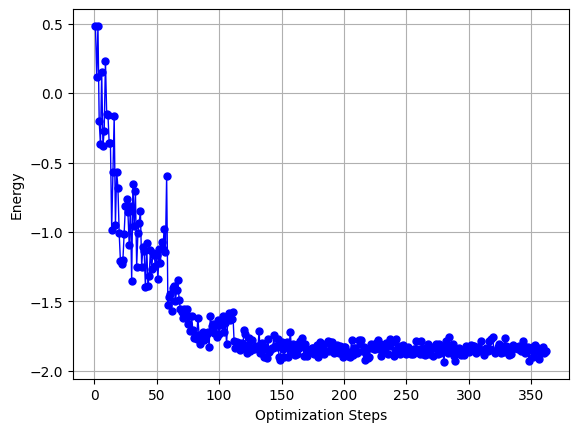

In [62]:
# Backend for the simulation
from qiskit_aer import Aer
from qiskit_algorithms.optimizers import COBYLA
backend = Aer.get_backend('statevector_simulator')

# Custom callback to track parameters at each step
steps = []
energy = []
class ParameterTracker:
    def __init__(self):
        self.params_history = []

    def callback(self, eval_count, params, mean, std):
        self.params_history.append((eval_count, params.copy(), mean))
        # print(f"Step {eval_count}: Energy = {mean:.6f}, Parameters = {params}")
        energy.append(mean)
        steps.append(eval_count)

tracker = ParameterTracker()


# Define the ansatz (EfficientSU2)
num_qubits = qubit_hamiltonian.num_qubits
ansatz = EfficientSU2(num_qubits, reps=5, insert_barriers=True, entanglement="full")
print(ansatz.decompose().draw(fold=-1))

# Define the optimizer
optimizer = COBYLA(maxiter=1000)

# Define the VQE instance
vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=optimizer, callback=tracker.callback)

# Run VQE
result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)

# Display results
print("\nFinal Results:")
print(f"Ground state energy: {result.eigenvalue.real}")
print("Parameters at each step:")
# for step in tracker.params_history:
#     step_idx, params, energy = step
#     print(f"Step {step_idx}: Energy = {energy:.6f}, Parameters = {params}")


# Plotting the energy at each step
plt.plot(steps, energy, marker='o', linestyle='-', color='b', linewidth=1.0, markersize=5)
# plt.title("VQE Optimization: Energy vs Steps")
plt.xlabel("Optimization Steps")
plt.ylabel("Energy")
plt.grid()
plt.show()

     ┌──────────┐┌──────────┐ ░ ┌───┐           ░ ┌──────────┐ ┌──────────┐ ░           ┌───┐ ░ ┌───────────┐┌───────────┐ ░           ┌───┐ ░ ┌───────────┐┌───────────┐ ░      ┌───┐      ░ ┌───────────┐┌───────────┐ ░      ┌───┐      ░ ┌───────────┐┌───────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├─░─┤ X ├──■────────░─┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├─░────────■──┤ X ├─░─┤ Ry(θ[12]) ├┤ Rz(θ[15]) ├─░───■───────┤ X ├─░─┤ Ry(θ[18]) ├┤ Rz(θ[21]) ├─░───■──┤ X ├──────░─┤ Ry(θ[24]) ├┤ Rz(θ[27]) ├─░──────┤ X ├──■───░─┤ Ry(θ[30]) ├┤ Rz(θ[33]) ├
     ├──────────┤├──────────┤ ░ └─┬─┘┌─┴─┐      ░ ├──────────┤┌┴──────────┤ ░ ┌───┐  │  └─┬─┘ ░ ├───────────┤├───────────┤ ░ ┌─┴─┐     └─┬─┘ ░ ├───────────┤├───────────┤ ░   │  └─┬─┘┌───┐ ░ ├───────────┤├───────────┤ ░      └─┬─┘┌─┴─┐ ░ ├───────────┤├───────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├─░───┼──┤ X ├──■───░─┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├─░─┤ X ├──┼────■───░─┤ Ry(θ[13]) ├┤ Rz(θ[16]) ├─░─┤ X ├──■────┼───░─┤ Ry(θ[19]) ├┤ Rz(θ[22]) ├─░───┼────■──┤ X ├─░─┤ Ry(θ[25]) ├┤ Rz(

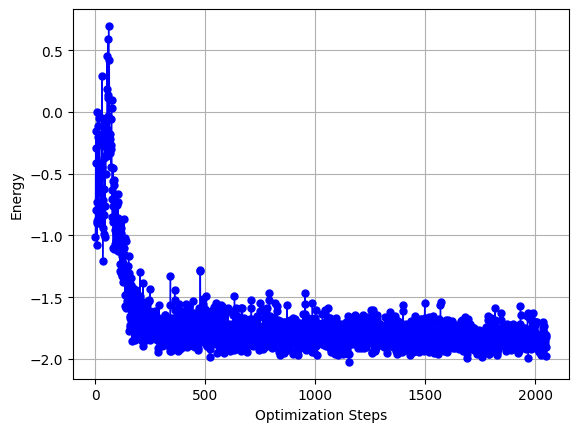

In [59]:
# Backend for the simulation
from qiskit_aer import Aer
from qiskit_algorithms.optimizers import COBYLA, SPSA, GradientDescent, L_BFGS_B
backend = Aer.get_backend('statevector_simulator')

# Custom callback to track parameters at each step
steps = []
energy = []
class ParameterTracker:
    def __init__(self):
        self.params_history = []

    def callback(self, eval_count, params, mean, std):
        self.params_history.append((eval_count, params.copy(), mean))
        # print(f"Step {eval_count}: Energy = {mean:.6f}, Parameters = {params}")
        energy.append(mean)
        steps.append(eval_count)

tracker = ParameterTracker()


# Define the ansatz (EfficientSU2)
num_qubits = qubit_hamiltonian.num_qubits
ansatz = EfficientSU2(num_qubits, reps=5, insert_barriers=True, entanglement="sca", su2_gates=['ry', 'rz'])
print(ansatz.decompose().draw(fold=-1))

# Define the optimizer
optimizer = SPSA(maxiter=1000)

# Define the VQE instance
vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=optimizer, callback=tracker.callback)

# Run VQE
result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)

# Display results
print("\nFinal Results:")
print(f"Ground state energy: {result.eigenvalue.real}")
print("Parameters at each step:")
# for step in tracker.params_history:
#     step_idx, params, energy = step
#     print(f"Step {step_idx}: Energy = {energy:.6f}, Parameters = {params}")


# Plotting the energy at each step
plt.plot(steps, energy, marker='o', linestyle='-', color='b', linewidth=1.0, markersize=5)
# plt.title("VQE Optimization: Energy vs Steps")
plt.xlabel("Optimization Steps")
plt.ylabel("Energy")
plt.grid()
plt.show()